# `1- Classification`

In [100]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [101]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [102]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [103]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [104]:
iris.data.shape

(150, 4)

In [105]:
iris.target_names # 0, 1, 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Exploratory data analysis 'EDA'

In [106]:
X= iris.data
y= iris.target
df = pd.DataFrame(X, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visual EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a38b55b00>,
      dtype=object)

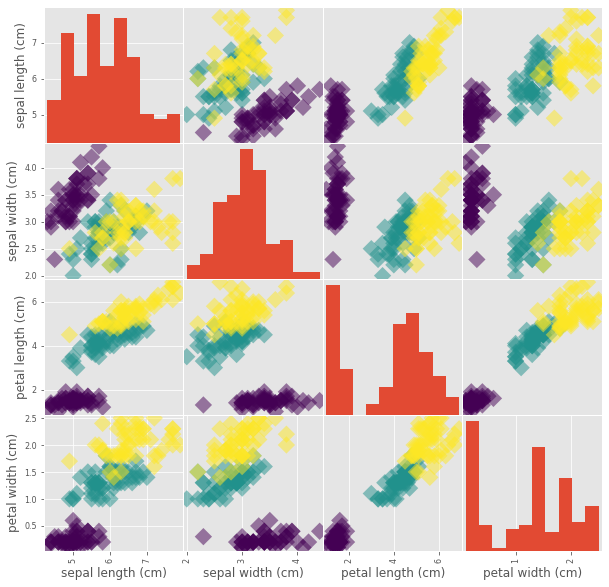

In [107]:
pd.plotting.scatter_matrix(df, c = y, figsize=[10, 10], s= 150, marker='D')


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [109]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [110]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


ValueError: Could not interpret input 'missile'

<Figure size 432x288 with 0 Axes>

## Measuring model performance


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.3, random_state = 21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

In [112]:
knn.score(X_test, y_test)

0.9555555555555556

# `2- Regression`

In [113]:
from sklearn.datasets import load_boston
X,y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [114]:
X_rooms = X[:,5].reshape(-1,1) # X[:,5] average number of rooms
X_rooms.shape

(506, 1)

Text(0, 0.5, 'value of houses')

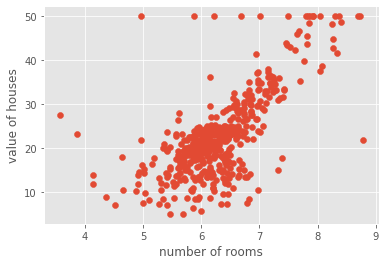

In [115]:
plt.scatter(X_rooms,y)
plt.xlabel('number of rooms')
plt.ylabel('value of houses')

## 2.1- Linear Regression

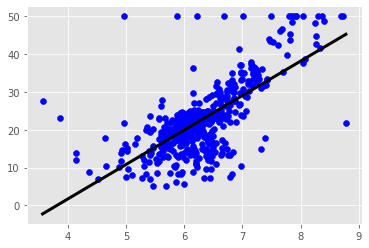

In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

plt.scatter(X_rooms,y, color='blue')
plt.plot(prediction_space,reg.predict(prediction_space),
        color='black', linewidth=3)

In [117]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create arrays for features and target variable
y = df['fertility'].values
X = df['life'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


FileNotFoundError: [Errno 2] File b'gapminder.csv' does not exist: b'gapminder.csv'

In [ ]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

## 2.2- Regularized Regression `Ridge`
*  Lasso used the `L2` penalty to regularize

In [ ]:
from IPython.display import Image
Image(filename='ridge.png')

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

## 2.3- Regularized Regression `lasso`
*  Lasso used the `L1` penalty to regularize

In [ ]:
Image(filename='lasso.png')

In [ ]:
from sklearn.linear_model import Lasso
names = load_boston.drop('MEDV', axis=1).columns
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42 )
lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)
lasso_coef = lasso.fit(X_train, y_train).coef_



# How good is your model?


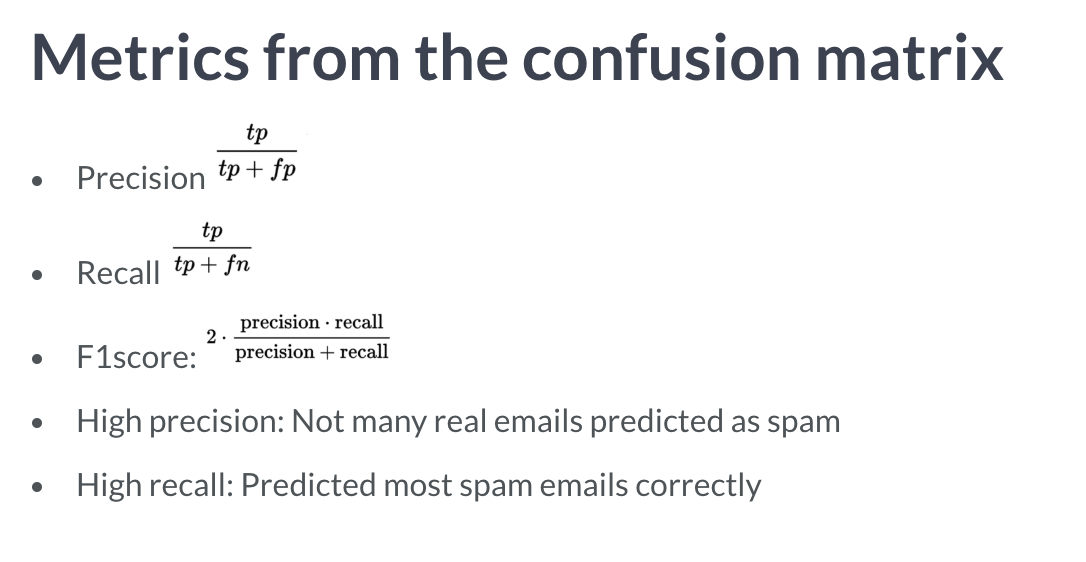

In [135]:
Image(filename='CM.png')

In [130]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

BreastData = load_breast_cancer()
X = BreastData.data
y = BreastData.target
knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42 )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [131]:
print(confusion_matrix(y_test, y_pred))


[[ 59   4]
 [  2 106]]


# Logistic regression and the ROC curve


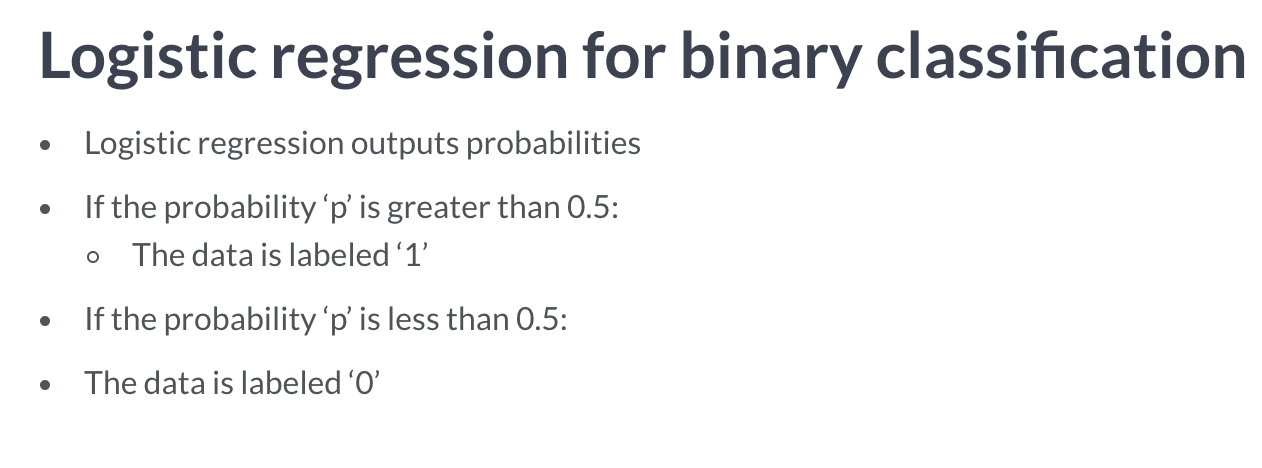

In [136]:
Image(filename='logReg.png')

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

BreastData = load_breast_cancer()
X = BreastData.data
y = BreastData.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42 )

logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Ploting the ROC Curve `receiver operating characteristic curve`

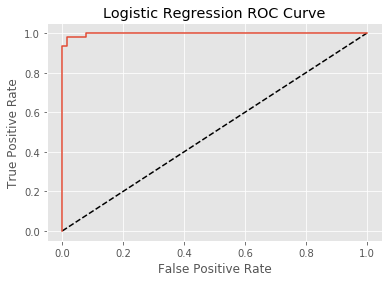

In [158]:
from sklearn.metrics import roc_curve
y_pred_prob = logReg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


## Area under the ROC curve `AUC`

In [159]:
from sklearn.metrics import roc_auc_score

y_pred_prob = logReg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.9977954144620812

In [163]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(logReg, X, y,cv=5, scoring='roc_auc')
print(cv)
print(np.mean(cv))

[0.99418605 0.99192506 0.99698189 0.98289738 0.99664655]
0.9925273865414711


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

# `3- Hyperparameter tuning`


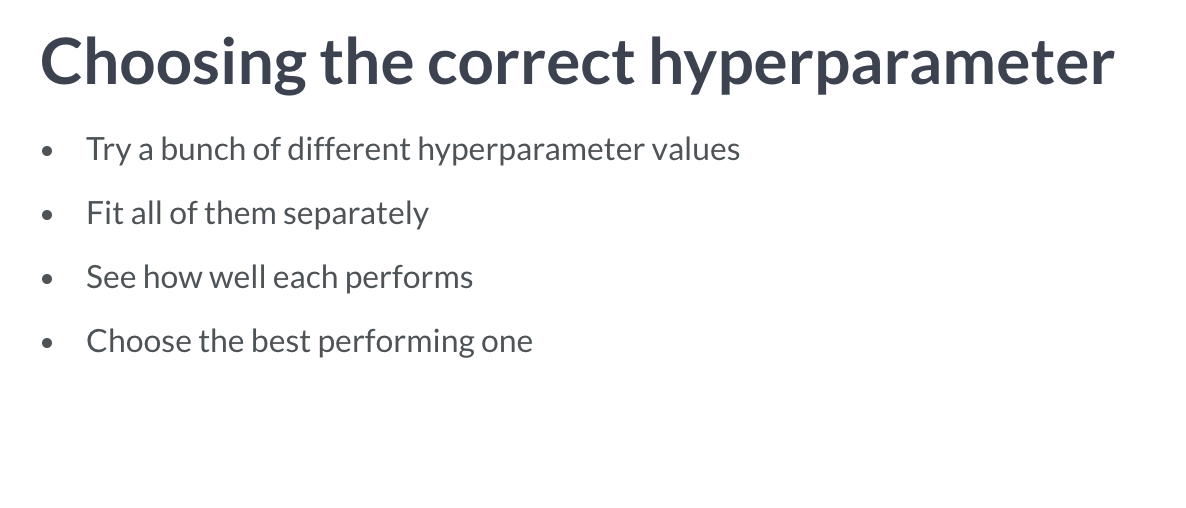

In [164]:
Image(filename='HP.png')

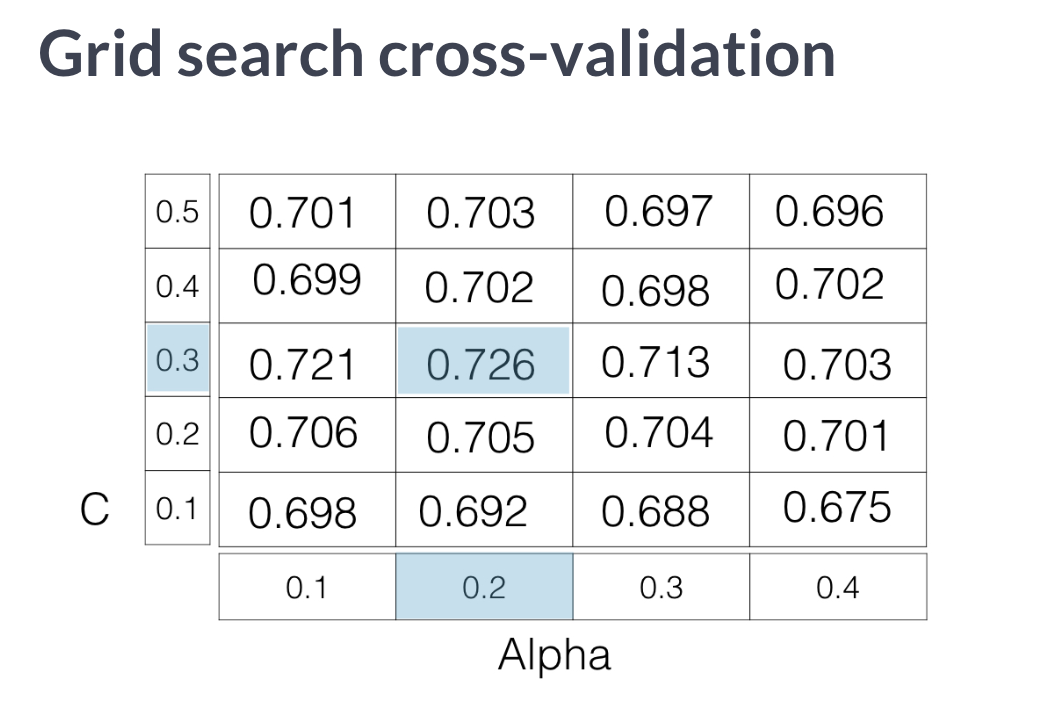

In [165]:
Image(filename='GS.png')

## GridSearchCV

In [167]:
from sklearn.model_selection import GridSearchCV

param_grid= {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 12}
0.9332161687170475


In [171]:
x1 = np.logspace(0.1, 1, 5)
x1

array([ 1.25892541,  2.11348904,  3.54813389,  5.95662144, 10.        ])

## Hold-out set for final evaluation


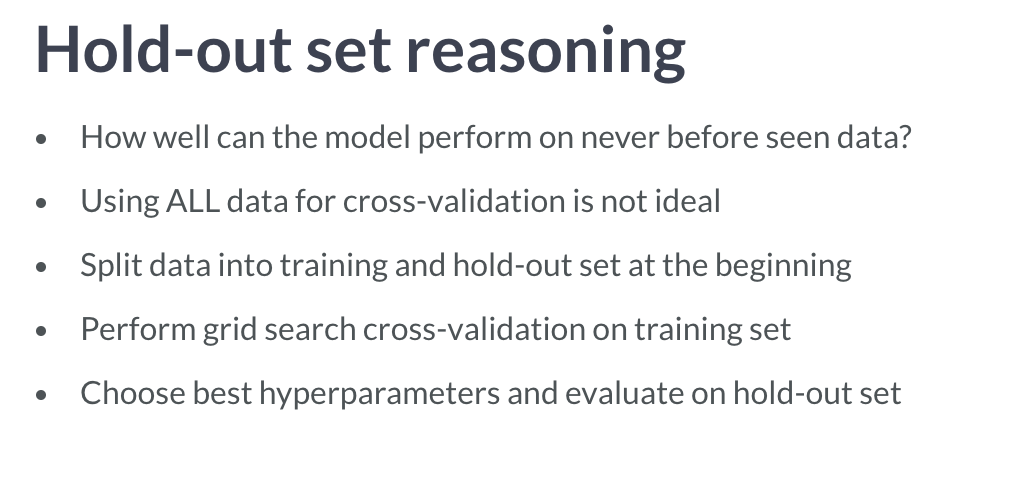

In [173]:
Image(filename='Hout.png')

In [174]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.4, random_state= 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureW

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

Tuned Logistic Regression Parameter: {'C': 19306.977288832535, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9530791788856305


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

In [175]:
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 19306.977288832535, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9530791788856305


In [179]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv= 5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.75122987864146, tolerance: 0.006570220588235293
  positive)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.481806337869934, tolerance: 0.00638901098901099
  positive)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.296667993445732, tolerance: 0.006527472527472529
  positive)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective di

In [180]:
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.6803132060642147
Tuned ElasticNet MSE: 0.07281262773545123


# `4- Preprocessing and pipelines`

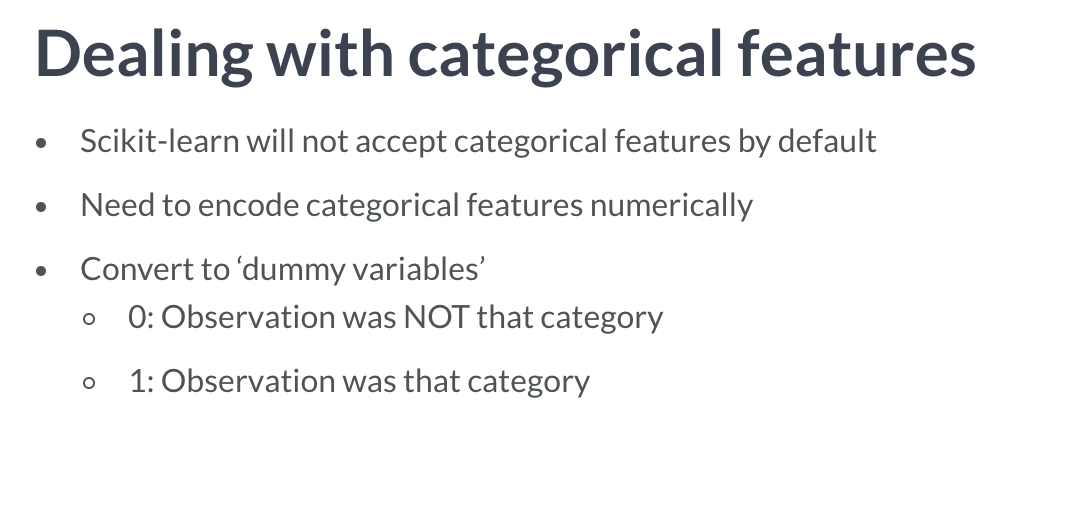

In [181]:
Image(filename='CF.png')

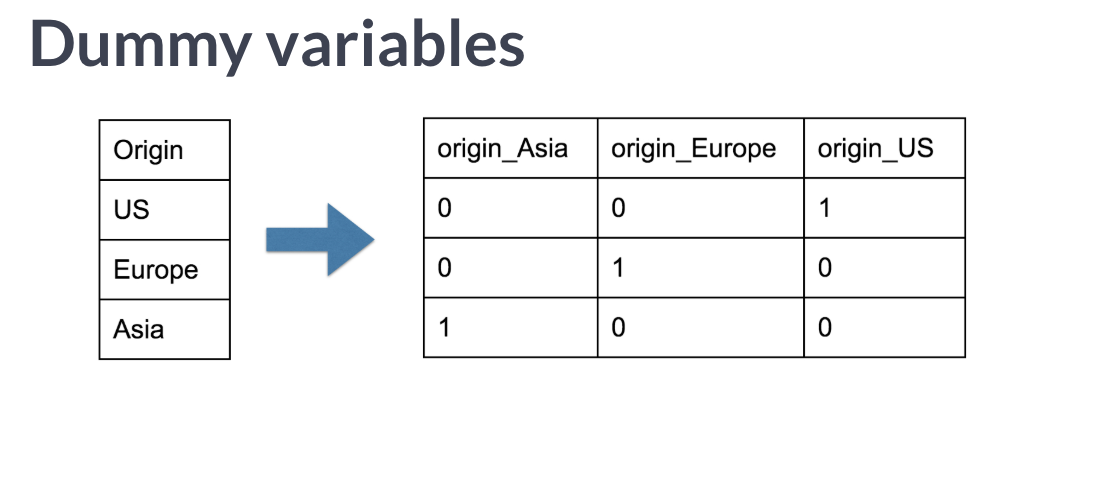

In [182]:
Image(filename='DV1.png')

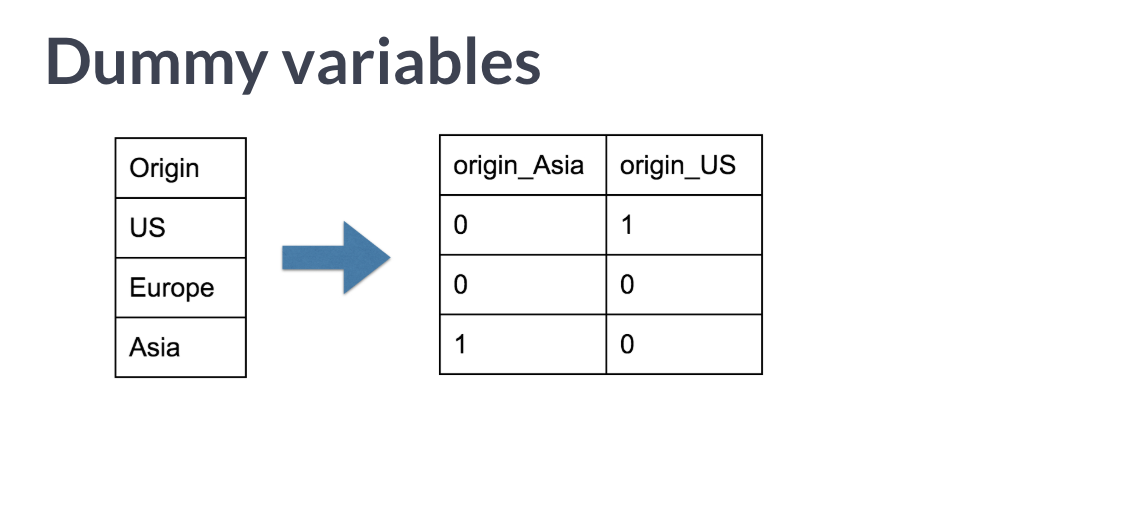

In [183]:
Image(filename='DV2.png')

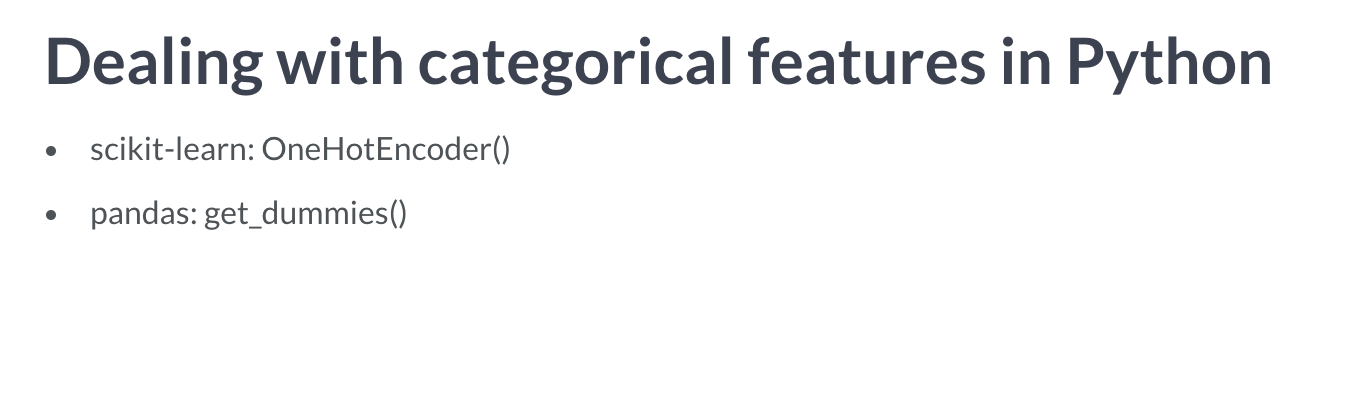

In [184]:
Image(filename='du.png')

## Dummy Variables

In [190]:
import pandas as pd
df = pd.read_csv('Automobile miles per gallon.csv')
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [191]:
df_origin = pd.get_dummies(df) # dummy variables
df_origin.head() # Creat 3 binary features

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [192]:
# actually we needed to 2 feature instate of 3
df_origin= df_origin.drop('origin_Asia', axis=1)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


## Linear Reg model with dummy variables

In [193]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.4, random_state= 42)
ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7345557906063536

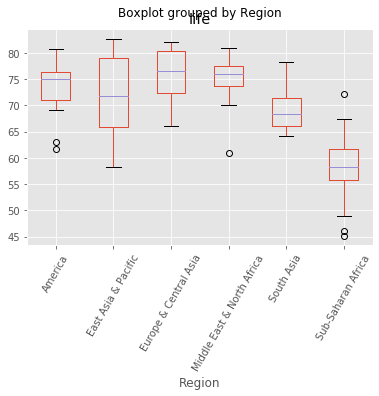

In [195]:
# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


# Handling missing data


In [201]:
df = pd.read_csv('Diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [202]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Replace the zeros values with NAN

In [203]:
## as we sow ther is some columns have a zero , so we replace it to nan and implace it with mean value
df.insulin.replace(0, np.nan, inplace= True)
df.triceps.replace(0, np.nan, inplace= True)
df.bmi.replace(0, np.nan, inplace= True)


In [204]:
df.info()
# sew the diffirence between the values
# triceps   541 non-null float64 ,768-541=227 zeros
# insulin   394 non-null float64 ,768-394=374 zeros
# bmi       757 non-null float64 ,768-757=11 zeros


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


### Replace the NAN values with mean values for that col

In [207]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy= 'mean')
imp.fit_transform(X)


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [210]:
# split it
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.4, random_state= 42)

# fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9649122807017544

### maka all of it by Pipline

In [211]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

imp = Imputer(missing_values = 'NaN', strategy= 'mean')
logreg = LogisticRegression()
steps= [('impution', imp), ('regressor', logreg)]

pipline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.4, random_state= 42)

pipline.fit(X_train, y_train)
y_pred = pipline.predict(X_test)
pipline.score(X_test, y_test)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9649122807017544

# Centering and scaling


In [268]:
df = pd.read_csv('Red wine quality.csv',  delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [269]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


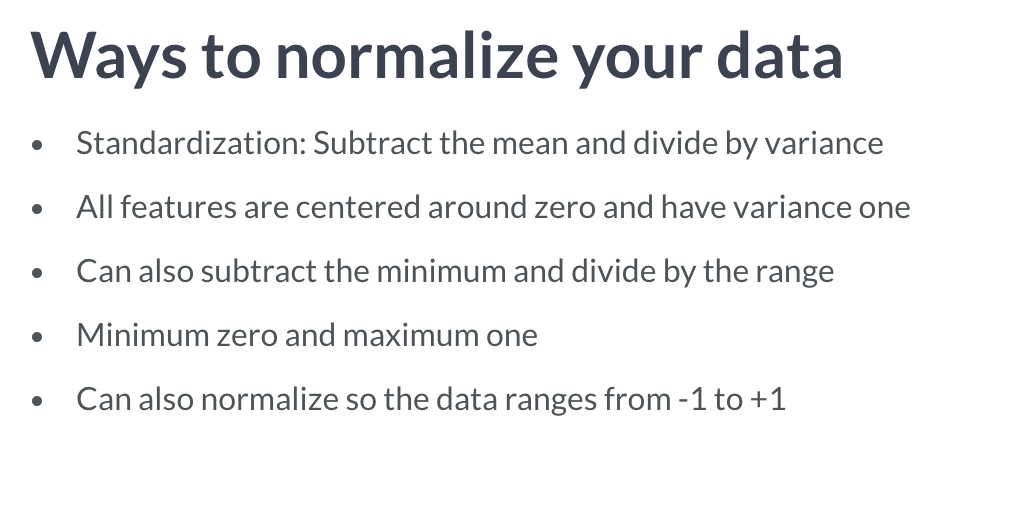

In [270]:
Image(filename='scale.png')

In [271]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [272]:
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [273]:
print(np.mean(X))
print(np.std(X))

8.134219224515322
16.726533979432848


In [274]:
# Standrization
from sklearn.preprocessing import scale
X = scale(X)
print(np.mean(X))
print(np.std(X))

2.546626531486538e-15
1.0


### Scaling in pipline

In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
steps = [('scale',StandardScaler() ), ('knn', KNeighborsClassifier())]
pipline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state= 42)

knn_scaled= pipline.fit(X_train, y_train)
y_pred= knn_scaled.predict(X_test)
accuracy_score(y_test, y_pred)

0.546875

In [276]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.553125

### CV and Scaling in pipline

In [277]:
steps = [('scale',StandardScaler() ), ('knn', KNeighborsClassifier())]
pipline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state= 21)

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)


cv = GridSearchCV(pipline, param_grid)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Invalid parameter n_neighbors for estimator Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [278]:
cv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

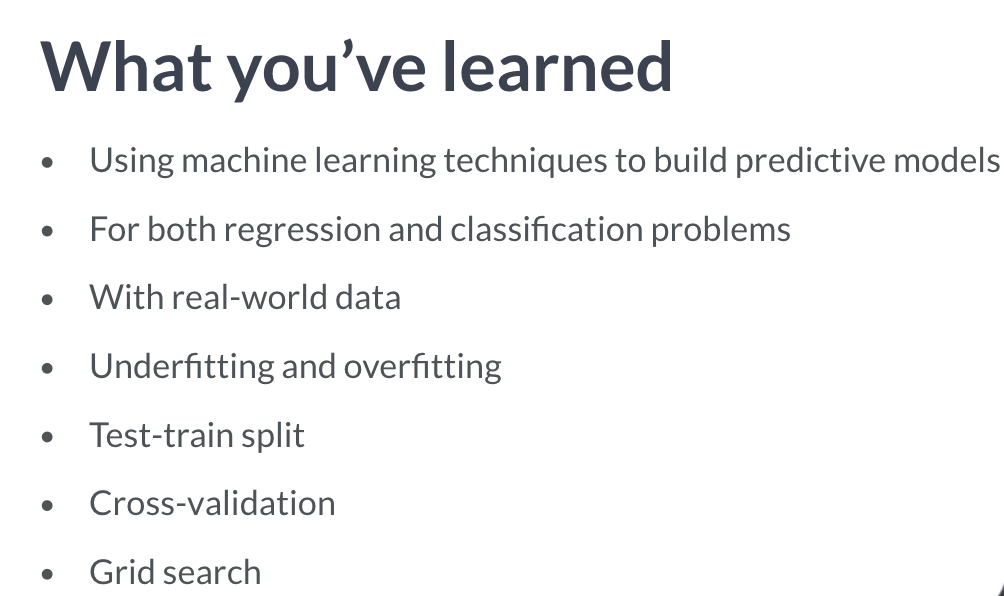

In [280]:
Image(filename='lr1.png')


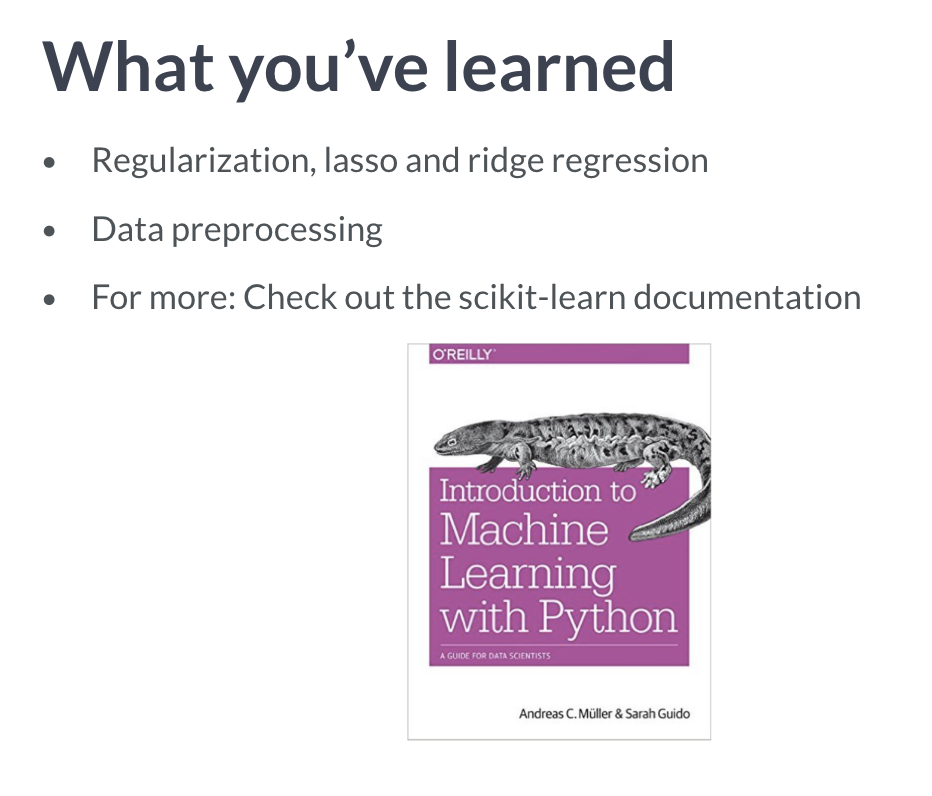

In [281]:
Image(filename='lr2.png')